<a href="https://colab.research.google.com/github/archangel2006/MachineLearning-SlitherAI/blob/main/Student_Social_Media_Addiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STUDENT SOCIAL MEDIA ADDICTION

In [ ]:
# Data handling
import numpy as np
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Students Social Media Addiction.csv')

In [ ]:
df.shape

(705, 13)

In [ ]:
df.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Academic_Level,object
Country,object
Avg_Daily_Usage_Hours,float64
Most_Used_Platform,object
Affects_Academic_Performance,object
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64


In [ ]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [ ]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [ ]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


# DATA PREPROCESSING & CLEANING


In [ ]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [ ]:
df.drop(columns=['Student_ID'], inplace=True)

In [ ]:
print(df['Affects_Academic_Performance'].value_counts())

Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64


# FEATURE ENGINEERING


* Feature scaling is a technique used in data preprocessing to normalize the range of independent variables (features) in your dataset.
* It's important because many machine learning algorithms (especially those based on distance, gradient descent, or magnitude) are sensitive to the scale of data.

# ENCODING
Encoding is converting categorical (text/string) columns into numeric form, because machine learning models can’t process strings.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# One Hot Encoding

* For nominal (non-ordered) variables with multiple categories

* Country, Most_Used_Platform, Relationship_Status

In [ ]:
cols_encoding=df[['Country','Most_Used_Platform','Relationship_Status']]
# pd.get_dummies(...) : Converts categorical columns into binary (0/1) columns for each unique category.
# stype=int : Makes sure the resulting dummy columns are integers (0/1), not Boolean (True/False).

In [ ]:
df_encoded1=pd.get_dummies(cols_encoding,columns=['Country'],dtype=int)
df_encoded1.head()

,Most_Used_Platform,Relationship_Status,Country_Afghanistan,Country_Albania,Country_Andorra,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_UAE,Country_UK,Country_USA,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vatican City,Country_Venezuela,Country_Vietnam,Country_Yemen
0,Instagram,In Relationship,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Twitter,Single,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TikTok,Complicated,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,YouTube,Single,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Facebook,In Relationship,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded2=pd.get_dummies(cols_encoding,columns=['Most_Used_Platform'],dtype=int)
df_encoded2.head()

,Country,Relationship_Status,Most_Used_Platform_Facebook,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube
0,Bangladesh,In Relationship,0,1,0,0,0,0,0,0,0,0,0,0
1,India,Single,0,0,0,0,0,0,0,1,0,0,0,0
2,USA,Complicated,0,0,0,0,0,0,1,0,0,0,0,0
3,UK,Single,0,0,0,0,0,0,0,0,0,0,0,1
4,Canada,In Relationship,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded3=pd.get_dummies(cols_encoding,columns=['Relationship_Status'],dtype=int)
df_encoded3.head()

,Country,Most_Used_Platform,Relationship_Status_Complicated,Relationship_Status_In Relationship,Relationship_Status_Single
0,Bangladesh,Instagram,0,1,0
1,India,Twitter,0,0,1
2,USA,TikTok,1,0,0
3,UK,YouTube,0,0,1
4,Canada,Facebook,0,1,0


In [ ]:
encoded_cols = pd.get_dummies(cols_encoding, columns=['Country', 'Most_Used_Platform', 'Relationship_Status'], dtype=int)
encoded_cols.head()


,Country_Afghanistan,Country_Albania,Country_Andorra,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,...,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_Complicated,Relationship_Status_In Relationship,Relationship_Status_Single
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Label Encoding

* For binary or nominal categories (not many unique values)

In [ ]:
binary_cols=df[['Gender','Affects_Academic_Performance']].copy()

le_Gender=LabelEncoder()
le_Performance=LabelEncoder()

binary_cols['Gender'] = le_Gender.fit_transform(binary_cols['Gender'])
binary_cols['Affects_Academic_Performance'] = le_Performance.fit_transform(binary_cols['Affects_Academic_Performance'])

binary_cols.head()

,Gender,Affects_Academic_Performance
0,0,1
1,1,0
2,0,1
3,1,0
4,1,1


# Ordinal Encoding

* For ordered categories (e.g., education level)

In [ ]:
df['Academic_Level'].unique()

array(['Undergraduate', 'Graduate', 'High School'], dtype=object)

In [ ]:
categorical_col=df[['Academic_Level']].copy()

oe_Education = OrdinalEncoder(categories = [['High School','Undergraduate','Graduate']])
categorical_col['Academic_Level'] = oe_Education.fit_transform(categorical_col[['Academic_Level']])

categorical_col.head(7)

,Academic_Level
0,1.0
1,2.0
2,1.0
3,0.0
4,2.0
5,1.0
6,2.0


In [ ]:
encoded_categorical_df = pd.concat([encoded_cols,binary_cols,categorical_col], axis=1)

In [ ]:
encoded_categorical_df.head()

,Country_Afghanistan,Country_Albania,Country_Andorra,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,...,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_Complicated,Relationship_Status_In Relationship,Relationship_Status_Single,Gender,Affects_Academic_Performance,Academic_Level
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,2.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,2.0


# SCALING


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
sns.set(style="whitegrid")

In [ ]:
numeric_cols = df[[
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]].copy()

In [ ]:
numeric_cols.head()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
0,19,5.2,6.5,6,3,8
1,22,2.1,7.5,8,0,3
2,20,6.0,5.0,5,4,9
3,18,3.0,7.0,7,1,4
4,21,4.5,6.0,6,2,7


# VISUALIZATION (To select Scaling Type)

# SNS Styles

*  sns.set_style("whitegrid") : white background with gridlines
*  sns.set_style("darkgrid") : dark background with gridlines
*  sns.set_style("white") :white background, no gridlines
*  sns.set_style("dark") : dark background, no gridlines
*  sns.set_style("ticks") : minimalist style with ticks on axes

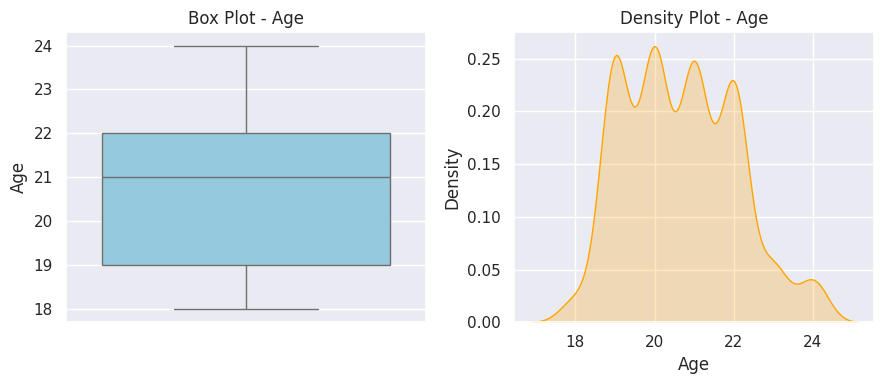

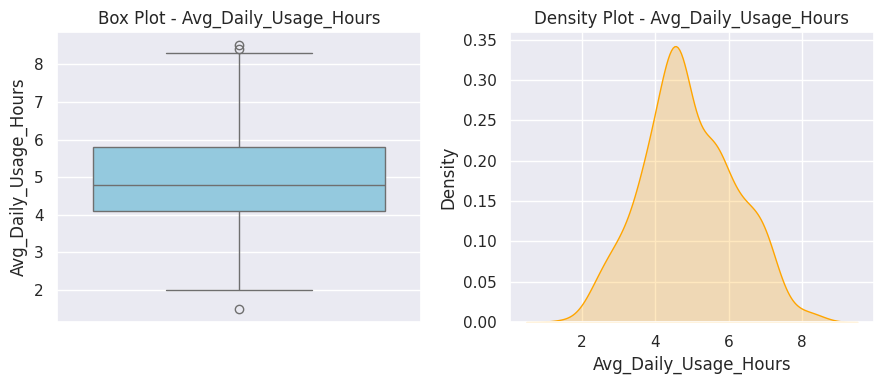

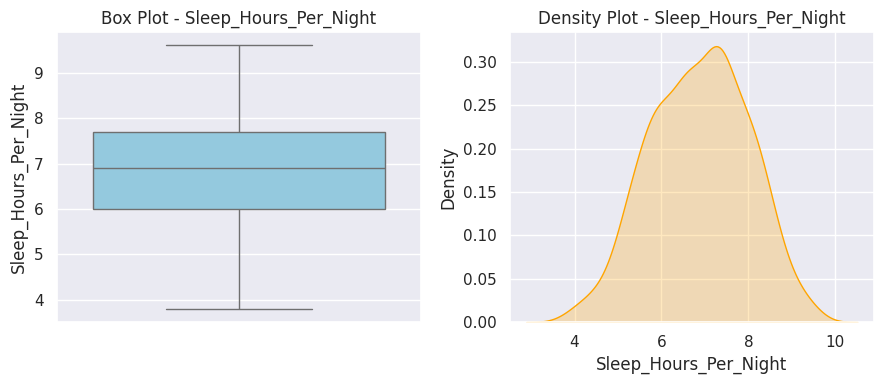

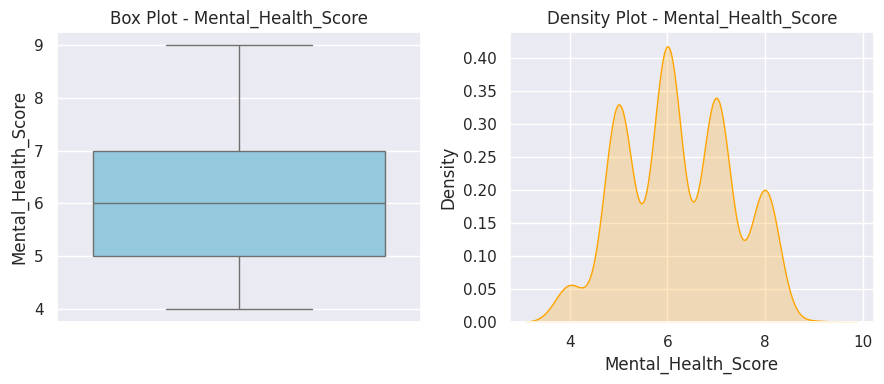

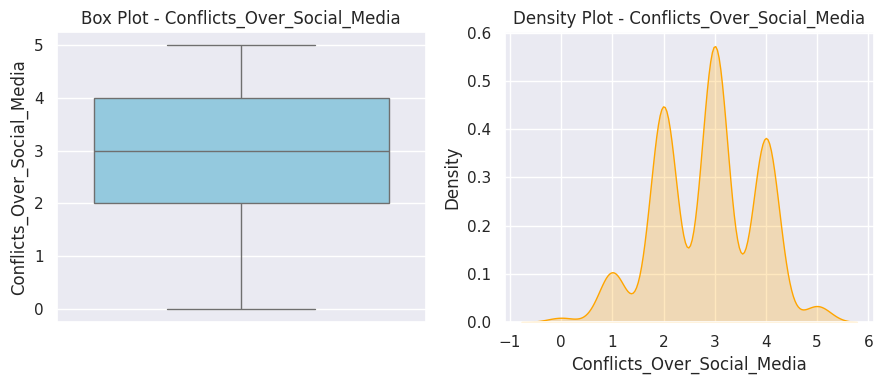

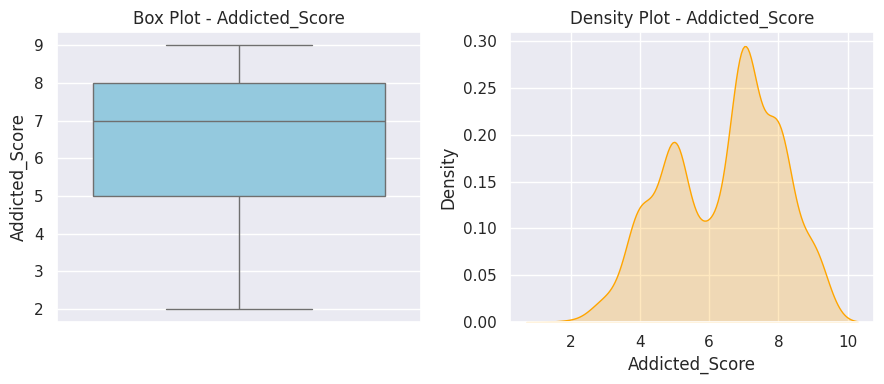

In [ ]:

# Set seaborn style
sns.set(style="darkgrid")

# Plot
for col in numeric_cols.columns:
    fig, axes = plt.subplots(1, 2, figsize=(9,4))

    # Boxplot
    sns.boxplot(y=numeric_cols[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Box Plot - {col}')

    # Density Plot (KDE)
    sns.kdeplot(data=numeric_cols[col], ax=axes[1], fill=True, color='orange')
    axes[1].set_title(f'Density Plot - {col}')

    plt.tight_layout()
    plt.show()


| Column                             | Observation                                | Suggested Scaler                           | Reason                                                            |
| ---------------------------------- | ------------------------------------------ | ------------------------------------------ | ----------------------------------------------------------------- |
| **Age**                            | Multiple peaks (multi-modal), not skewed   | **StandardScaler**                         | Not skewed, no outliers, handles multi-peaks well                 |
| **Avg\_Daily\_Usage\_Hours**       | Outliers present                           | **RobustScaler**                           | Best for outlier handling                                         |
| **Sleep\_Hours\_Per\_Night**       | Bell-shaped, evenly scattered              | **StandardScaler** or **MinMaxScaler** | Either works well; prefer **StandardScaler** for normal dist.     |
| **Mental\_Health\_Score**          | Many peaks, not skewed                     | **StandardScaler**                         | No strong skew or outliers; handles multi-modal well              |
| **Conflicts\_Over\_Social\_Media** | Too many peaks, not skewed, maybe discrete | **StandardScaler**                         | No outliers; standardizing makes sense                            |
| **Addicted\_Score**                | Two peaks (bimodal)                        | **StandardScaler**                         | Bimodal = OK for StandardScaler; avoids shrinking values too much |


# Standard Scaling

* Age
* Mental_Health_Score
* Conflicts_Over_Social_Media
* Addicted_Score

In [ ]:
cols1=df[[
    'Age',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]]

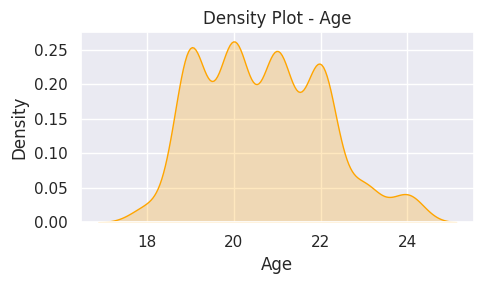

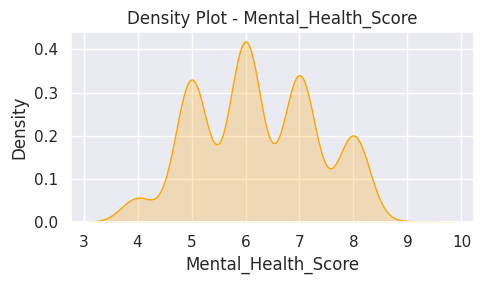

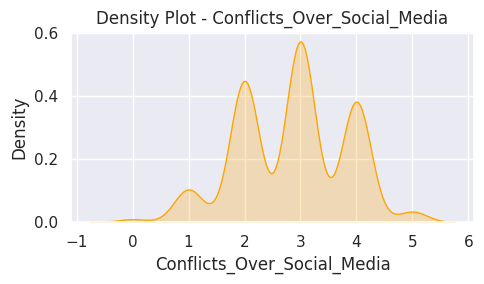

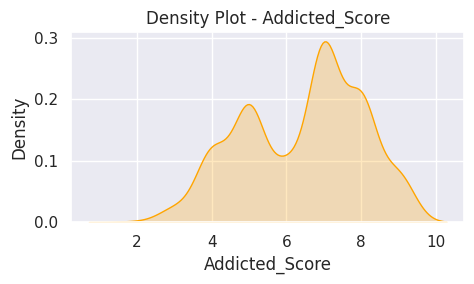

In [ ]:
# Plot
for col in cols1.columns:
    fig, ax = plt.subplots(figsize=(5,3))

    # Density Plot (KDE)
    sns.kdeplot(data=cols1[col], ax=ax, fill=True, color='orange')
    ax.set_title(f'Density Plot - {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
cols1['Age'].skew()

np.float64(0.3689089873179225)

In [ ]:
cols1['Mental_Health_Score'].skew()

np.float64(0.049022622911663795)

In [ ]:
cols1['Conflicts_Over_Social_Media'].skew()

np.float64(-0.16233999355196413)

In [ ]:
cols1['Addicted_Score'].skew()

np.float64(-0.2968284852454909)

In [ ]:
scaler=StandardScaler()
scaled_standard = scaler.fit_transform(cols1)
cols1=pd.DataFrame(scaled_standard, columns=['Age','Mental_Health_Score','Conflicts_Over_Social_Media','Addicted_Score'])
cols1.head()

,Age,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
0,-1.186915,-0.205520,0.157063,0.985550
1,0.958662,1.605628,-2.976790,-2.166958
2,-0.471723,-1.111095,1.201681,1.616052
3,-1.902108,0.700054,-1.932172,-1.536456
4,0.243470,-0.205520,-0.887554,0.355048


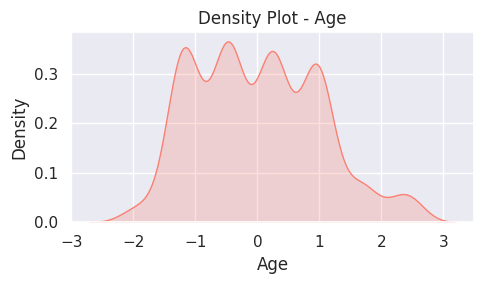

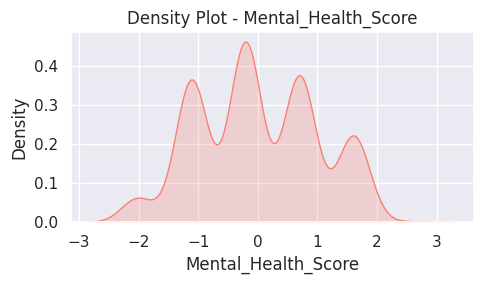

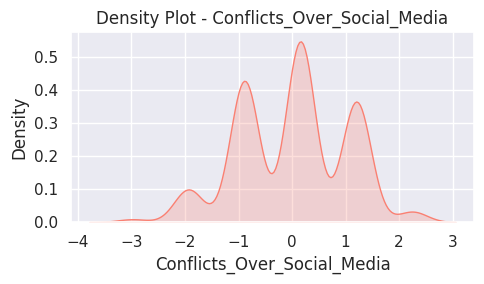

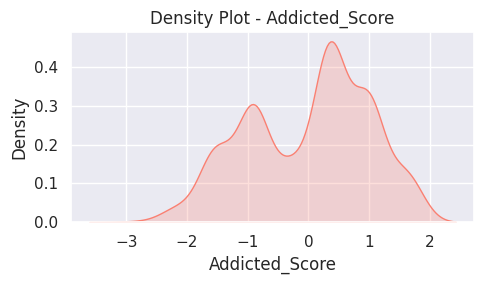

In [ ]:
# Plot
for col in cols1.columns:
    fig, ax = plt.subplots(figsize=(5,3))

    # Density Plot (KDE)
    sns.kdeplot(data=cols1[col], ax=ax, fill=True, color='salmon')
    ax.set_title(f'Density Plot - {col}')

    plt.tight_layout()
    plt.show()

# MinMax Scaling


In [ ]:
cols2=df[['Sleep_Hours_Per_Night']]

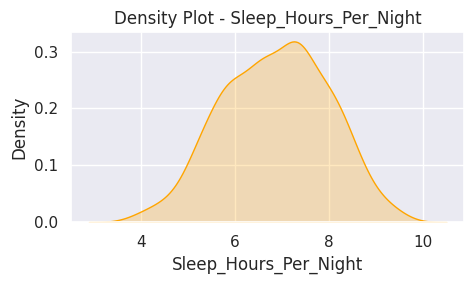

In [ ]:
# Plot
for col in cols2.columns:
    fig, ax = plt.subplots(figsize=(5,3))

    # Density Plot (KDE)
    sns.kdeplot(data=cols2[col], ax=ax, fill=True, color='orange')
    ax.set_title(f'Density Plot - {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
cols2['Sleep_Hours_Per_Night'].skew()

np.float64(-0.1090403313627565)

In [ ]:
scaler=MinMaxScaler()
scaled_minmax = scaler.fit_transform(cols2)
cols2=pd.DataFrame(scaled_minmax, columns=['Sleep_Hours_Per_Night'])
cols2.head()

,Sleep_Hours_Per_Night
0,0.465517
1,0.637931
2,0.206897
3,0.551724
4,0.379310


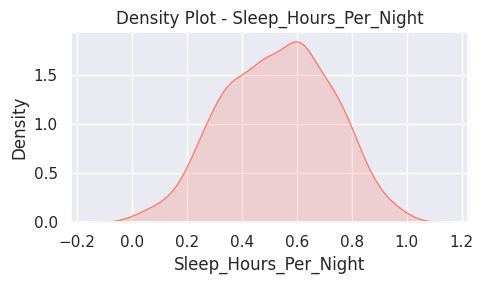

In [ ]:
# Plot
for col in cols2.columns:
    fig, ax = plt.subplots(figsize=(5,3))

    # Density Plot (KDE)
    sns.kdeplot(data=cols2[col], ax=ax, fill=True, color='salmon')
    ax.set_title(f'Density Plot - {col}')

    plt.tight_layout()
    plt.show()

# Robust Scaling

In [ ]:
cols3=df[['Avg_Daily_Usage_Hours']]

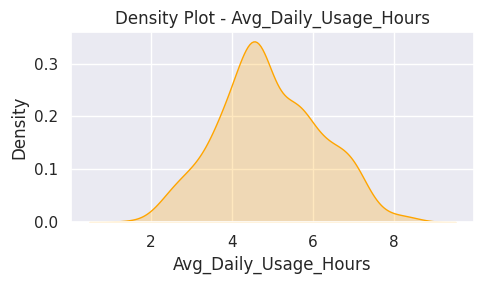

In [ ]:
# Plot
for col in cols3.columns:
    fig, ax = plt.subplots(figsize=(5,3))

    # Density Plot (KDE)
    sns.kdeplot(data=cols3[col], ax=ax, fill=True, color='orange')
    ax.set_title(f'Density Plot - {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
scaler=RobustScaler()
scaled_robust = scaler.fit_transform(cols3)
cols3=pd.DataFrame(scaled_robust, columns=['Avg_Daily_Usage_Hours'])
cols3.head()

,Avg_Daily_Usage_Hours
0,0.235294
1,-1.588235
2,0.705882
3,-1.058824
4,-0.176471


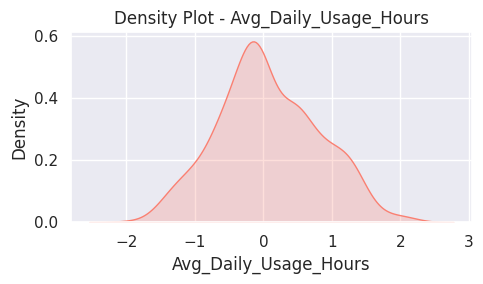

In [ ]:
# Plot
for col in cols3.columns:
    fig, ax = plt.subplots(figsize=(5,3))

    # Density Plot (KDE)
    sns.kdeplot(data=cols3[col], ax=ax, fill=True, color='salmon')
    ax.set_title(f'Density Plot - {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
scaled_numeric_df = pd.concat([cols1,cols2,cols3],axis=1)

In [ ]:
scaled_numeric_df.head()

,Age,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Sleep_Hours_Per_Night,Avg_Daily_Usage_Hours
0,-1.186915,-0.205520,0.157063,0.985550,0.465517,0.235294
1,0.958662,1.605628,-2.976790,-2.166958,0.637931,-1.588235
2,-0.471723,-1.111095,1.201681,1.616052,0.206897,0.705882
3,-1.902108,0.700054,-1.932172,-1.536456,0.551724,-1.058824
4,0.243470,-0.205520,-0.887554,0.355048,0.379310,-0.176471


# COMBINING DATA

In [ ]:
df_final = pd.concat([encoded_categorical_df,scaled_numeric_df], axis=1)
df_final.head()

,Country_Afghanistan,Country_Albania,Country_Andorra,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,...,Relationship_Status_Single,Gender,Affects_Academic_Performance,Academic_Level,Age,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Sleep_Hours_Per_Night,Avg_Daily_Usage_Hours
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1.0,-1.186915,-0.205520,0.157063,0.985550,0.465517,0.235294
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,2.0,0.958662,1.605628,-2.976790,-2.166958,0.637931,-1.588235
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1.0,-0.471723,-1.111095,1.201681,1.616052,0.206897,0.705882
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0.0,-1.902108,0.700054,-1.932172,-1.536456,0.551724,-1.058824
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,2.0,0.243470,-0.205520,-0.887554,0.355048,0.379310,-0.176471


# TRAINING-TEST SPLIT

Features (x) = all columns except the target.

Target (y) = the column we want to predict

In [ ]:
df.columns

Index(['Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours',
       'Most_Used_Platform', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

# 1. Classification Model - Predicting Affects_Academic_Performance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Features (x) = all columns except the target.
# Target (y) = the column we want to predict

x_cls = df_final.drop(columns = ['Affects_Academic_Performance'])
y_cls = df_final['Affects_Academic_Performance']

In [ ]:
# Train-test split

x_train_cls, x_test_cls, y_train_cls, y_test_cls = train_test_split(x_cls,y_cls, test_size=0.2, random_state=43)

# test_size=0.2 : 20% test, 80% training. tells the train_test_split() function how much of your data should go into the test set (unseen by the model during training).
# random_state=42 : setting a "seed" for randomness to make sure your results are repeatable every time you run the code.

# If your data is large or complex, it might take more time to converge.
# If you don’t set it, and it doesn’t converge in time, you’ll get a warning.
# 1000 is a safe upper limit to allow more time if needed.

In [ ]:
# Basic classifier model

clf = LogisticRegression(max_iter=1000)
clf.fit(x_train_cls,y_train_cls)

# max_iter=1000 : Sets the maximum number of iterations the model will try during training to find the best solution (especially for models like Logistic Regression that use iterative solvers).

LogisticRegression(max_iter=1000)

In [ ]:
# Predict

y_pred_cls = clf.predict(x_test_cls)

In [ ]:
# Evaluation

print("📊 Classification Results:")
print(f"Accuracy: {accuracy_score(y_test_cls,y_pred_cls)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test_cls,y_pred_cls)}")
print(f"Classification Repport:\n {classification_report(y_test_cls,y_pred_cls)}")

📊 Classification Results:
Accuracy: 1.0
Confusion Matrix:
 [[46  0]
 [ 0 95]]
Classification Repport:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        95

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



| **Metric**                  | **Value**                  | **Interpratation**                                                                                                                                          |
| --------------------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**                | `1.00` (100%)              | Your model correctly predicted **all 141 test cases**.                                                                                                     |
| **Confusion Matrix**        | `[[46, 0], [0, 95]]`       | 🟩 No errors: <br>• 46 True Negatives (class 0 predicted as 0)<br>• 95 True Positives (class 1 predicted as 1)<br>🟥 0 false positives or false negatives. |
| **Precision (class 0 & 1)** | `1.00`                     | Precision = TP / (TP + FP). <br>Every time the model predicted a class, it was correct.                                                                    |
| **Recall (class 0 & 1)**    | `1.00`                     | Recall = TP / (TP + FN). <br>The model found **all** relevant class members.                                                                               |
| **F1-Score (class 0 & 1)**  | `1.00`                     | Harmonic mean of precision and recall. Perfect performance.                                                                                                |
| **Macro Avg**               | `1.00`                     | Average score treating each class **equally**, regardless of frequency.                                                                                    |
| **Weighted Avg**            | `1.00`                     | Average score **weighted by support** (number of instances per class). <br>Accounts for class imbalance.                                                   |
| **Support (class 0 & 1)**   | 46 (class 0), 95 (class 1) |  46 "No" and 95 "Yes" examples in test data.                                                                                                        |


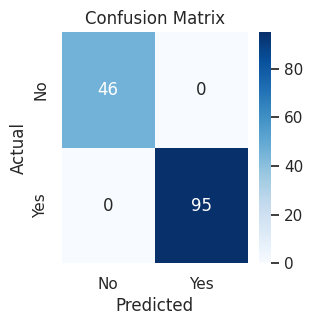

In [ ]:
# Confusion Matrix Heatmap

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test_cls, y_pred_cls)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# QUICK CHECKS FOR VERIFICATION

# Verify test split is correct
print(x_train_cls.shape, x_test_cls.shape)

#Check target distribution
print(y_cls.value_counts(normalize=True))

#Can try another model like RandomForest or KNN and compare

#Cross Validation to see if perfromance holds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(max_iter=1000), x_cls, y_cls, cv=5)
print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())


(564, 133) (141, 133)
Affects_Academic_Performance
1    0.642553
0    0.357447
Name: proportion, dtype: float64
Cross-validated scores: [1.        1.        1.        0.9787234 1.       ]
Mean accuracy: 0.9957446808510639


# 2. Regression - Predicting Addicted_Score

In [ ]:
# Import Modules

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Features (x) = all columns except the target.
# Target (y) = the column we want to predict

x_reg = df_final.drop(columns=['Addicted_Score'])
y_reg = df_final['Addicted_Score']

In [ ]:
# Train-Test Split

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

# test_size=0.2 : 20% test, 80% training. tells the train_test_split() function how much of your data should go into the test set (unseen by the model during training).
# random_state=42 : setting a "seed" for randomness to make sure your results are repeatable every time you run the code.

In [ ]:
# random_state controls the random split of training vs testing data
# Changing it to 30, 1, or anything else:
# Just gives a different train-test split

# Accuracy or R² may vary slightly based on how lucky/unlucky the split is.

# Good Practice:
   # Set random_state to a fixed number (e.g., 42 or 30)
   # That way, results are reproducible every time we run it

In [ ]:
# Basic Regressor Model

reg= LinearRegression()
reg.fit(x_train_reg,y_train_reg)

# max_iter=1000 is only needed for models that use iterative solvers, like:
# LogisticRegression, Ridge, Lasso, SGDRegressor ✅
# But LinearRegression() is a closed-form, analytical solver (no iteration)
# So it doesn't even have a max_iter parameter!

LinearRegression()

In [ ]:
# Predict

y_pred_reg = reg.predict(x_test_reg)

In [ ]:
# Evaluation

print("\n📈 Regression Results:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg)}")
print(f"R^2 Score:{r2_score(y_test_reg, y_pred_reg)}")


📈 Regression Results:
MSE: 0.03116886799957976
R^2 Score:0.9686663282085369


| Metric                            | Value                                                                                 |
| --------------------------------- | ------------------------------------------------------------------------------------- |
| **MSE** (Mean Squared Error)      | `0.031` → very low error between predicted vs actual                                  |
| **R² Score** (Explained Variance) | `0.969` → **96.9%** of the variance in `Addicted_Score` is explained by your features |


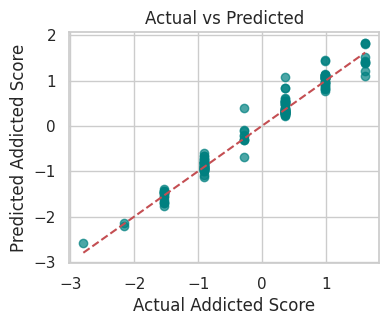

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color='teal')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Addicted Score')
plt.ylabel('Predicted Addicted Score')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

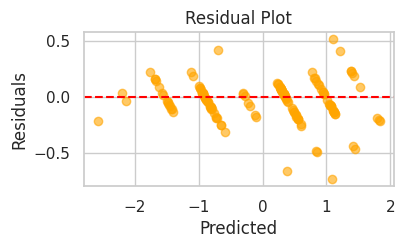

In [ ]:
residuals = y_test_reg - y_pred_reg

plt.figure(figsize=(4,2))
plt.scatter(y_pred_reg, residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


In [ ]:
# QUICK CHECKS FOR VERIFICATION

# Verify test split is correct
print(x_train_reg.shape, x_test_reg.shape)

#Can try another model like RandomForest and compare

#Cross Validation to see if perfromance holds
reg = LinearRegression()

cv_r2_scores = cross_val_score(reg, x_reg, y_reg, cv=5, scoring='r2')
cv_mse_scores = cross_val_score(reg, x_reg, y_reg, cv=5, scoring='neg_mean_squared_error')

print(f"Cross Validation R^2 Scores: {cv_r2_scores}")
print(f"Mean R^2: {cv_r2_scores.mean()}")
print(f"Mean MSE:{-cv_mse_scores.mean()}")

(564, 133) (141, 133)
Cross Validation R^2 Scores: [0.9112391  0.90478332 0.98157399 0.87976728 0.90751524]
Mean R^2: 0.9169757875776019
Mean MSE:0.0796393698456015
